In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [5]:
city_day = pd.read_csv('city_day.csv')
city_day['Date'] = pd.to_datetime(city_day['Date'])

In [6]:
city_day['PM'] = city_day['PM2.5']+city_day['PM10']
city_day['N'] = city_day['NO']+city_day['NO2']+city_day['NOx']
city_day['misc'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']

In [7]:
cities_AQI = city_day.pivot_table(values = 'AQI', index =['Date'], columns = 'City')
cities_PM = city_day.pivot_table(values = 'PM', index =['Date'], columns = 'City')
cities_N = city_day.pivot_table(values = 'N', index =['Date'], columns = 'City')
cities_misc = city_day.pivot_table(values = 'misc', index =['Date'], columns = 'City')
cities_NH3 = city_day.pivot_table(values = 'NH3', index =['Date'], columns = 'City')
cities_CO = city_day.pivot_table(values = 'CO', index =['Date'], columns = 'City')
cities_SO2 = city_day.pivot_table(values = 'SO2', index =['Date'], columns = 'City')
cities_O3 = city_day.pivot_table(values = 'O3', index =['Date'], columns = 'City')

In [8]:
cities_AQI = cities_AQI.resample(rule='MS').mean()
cities_PM = cities_PM.resample(rule='MS').mean()
cities_N = cities_N.resample(rule='MS').mean()
cities_misc = cities_misc.resample(rule='MS').mean()
cities_NH3 = cities_NH3.resample(rule='MS').mean()
cities_CO = cities_CO.resample(rule='MS').mean()
cities_SO2 = cities_SO2.resample(rule='MS').mean()
cities_O3 = cities_O3.resample(rule='MS').mean()

In [9]:
cities_AQI['India_AQI'] = cities_AQI.mean(axis=1)
cities_AQI['India_PM'] = cities_PM.mean(axis=1)
cities_AQI['India_N'] = cities_N.mean(axis=1)
cities_AQI['India_misc'] = cities_misc.mean(axis=1)
cities_AQI['India_NH3'] = cities_NH3.mean(axis=1)
cities_AQI['India_CO'] = cities_CO.mean(axis=1)
cities_AQI['India_SO2'] = cities_SO2.mean(axis=1)
cities_AQI['India_O3'] = cities_O3.mean(axis=1)

In [10]:
cities_AQI.reset_index()
cities = cities_AQI[['India_AQI','India_PM', 'India_N', 'India_misc','India_NH3', 'India_CO', 'India_SO2', 'India_O3']]

In [11]:
res_AQI = sm.tsa.seasonal_decompose(cities['India_AQI'], model = 'additive')
res_PM = sm.tsa.seasonal_decompose(cities['India_PM'], model = 'additive')
res_N = sm.tsa.seasonal_decompose(cities['India_N'], model = 'additive')
res_misc = sm.tsa.seasonal_decompose(cities['India_misc'], model = 'additive')
res_NH3 = sm.tsa.seasonal_decompose(cities['India_NH3'], model = 'additive')
res_CO = sm.tsa.seasonal_decompose(cities['India_CO'], model = 'additive')
res_SO2 = sm.tsa.seasonal_decompose(cities['India_SO2'], model = 'additive')
res_O3 = sm.tsa.seasonal_decompose(cities['India_O3'], model = 'additive')

In [12]:
print("AQI = ", sm.tsa.adfuller(cities['India_AQI'], autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(cities['India_PM'], autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(cities['India_N'], autolag = 'AIC')[1],
      "misc = ", sm.tsa.adfuller(cities['India_misc'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(cities['India_NH3'], autolag = 'AIC')[1],
      "CO = ", sm.tsa.adfuller(cities['India_CO'], autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(cities['India_SO2'], autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(cities['India_O3'], autolag = 'AIC')[1])
#adf, pval, usedlag, nobs, critical values, icbest, resstore

AQI =  0.9480031853242684 PM =  0.5253844586072645 N =  8.193038428894208e-07 misc =  0.13268436274674816 NH3 =  0.5329816251905 CO =  0.0009896915101338486 SO2 =  0.00030243578054873837 O3 =  0.6987197800366467


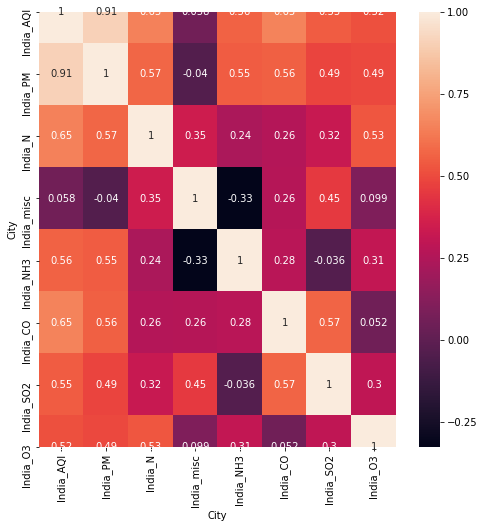

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(cities.corr(), annot = True)

Only N, CO and SO2 have a p value < 0.05, misc can be dropped
This implies that the rest of the variables are non-stationary
Let's visualize the variables

res_AQI.plot()
res_PM.plot()
res_N.plot()
res_NH3.plot()
res_CO.plot()
res_SO2.plot()
res_O3.plot()

Clear trend and seasonality in a lot of varaibles, let's perform differencing on non stationary variables

In [15]:
diff_city_AQI = cities['India_AQI'].diff(periods = 1)
diff_city_AQI.dropna(inplace = True)
#sm.tsa.seasonal_decompose(diff_city_AQI, model = 'additive').plot()

In [16]:
diff_city_PM = cities['India_PM'].diff(periods = 1)
diff_city_PM.dropna(inplace = True)
#sm.tsa.seasonal_decompose(diff_city_PM, model = 'additive').plot()

In [17]:
diff_city_NH3 = cities['India_NH3'].diff(periods = 1)
diff_city_NH3.dropna(inplace = True)
#sm.tsa.seasonal_decompose(diff_city_NH3, model = 'additive').plot()

In [18]:
diff_city_O3 = cities['India_O3'].diff(periods = 1)
diff_city_O3.dropna(inplace = True)
#sm.tsa.seasonal_decompose(diff_city_O3, model = 'additive').plot()

In [19]:
print("AQI = ", sm.tsa.adfuller(diff_city_AQI, autolag = 'AIC')[1],
      "PM = ", sm.tsa.adfuller(diff_city_PM, autolag = 'AIC')[1],
      "N = ", sm.tsa.adfuller(cities['India_N'], autolag = 'AIC')[1],
      "NH3 = ", sm.tsa.adfuller(diff_city_NH3, autolag = 'AIC')[1],
      "CO = ", sm.tsa.adfuller(cities['India_CO'], autolag = 'AIC')[1],
      "SO2 = ", sm.tsa.adfuller(cities['India_SO2'], autolag = 'AIC')[1],
      "O3 = ", sm.tsa.adfuller(diff_city_O3, autolag = 'AIC')[1])

AQI =  2.4485991962022827e-13 PM =  5.3299227861846e-09 N =  8.193038428894208e-07 NH3 =  4.613141405579754e-11 CO =  0.0009896915101338486 SO2 =  0.00030243578054873837 O3 =  0.018435717835630125


Now all the variables are stationary

In [ ]:
sm.graphics.tsa.plot_acf(diff_city_AQI, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_AQI,lags=30)

P Q value for AQI = 1,1

In [ ]:
sm.graphics.tsa.plot_acf(diff_city_PM, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_PM,lags=30)

P Q value for PM = 1,1

In [ ]:
sm.graphics.tsa.plot_acf(cities['India_N'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_N'],lags=30)

P Q value for N = 2,2

In [ ]:
sm.graphics.tsa.plot_acf(diff_city_NH3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_NH3,lags=30)

P Q value for NH3 = 1,1

In [ ]:
sm.graphics.tsa.plot_acf(cities['India_CO'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_CO'],lags=30)

P Q value for CO = 2,2

In [ ]:
sm.graphics.tsa.plot_acf(cities['India_SO2'], lags=30)
sm.graphics.tsa.plot_pacf(cities['India_SO2'],lags=30)

P Q value for SO2 = 2,2

In [ ]:
sm.graphics.tsa.plot_acf(diff_city_O3, lags=30)
sm.graphics.tsa.plot_pacf(diff_city_O3,lags=30)

P Q value for O3= 1,1

In [37]:
train = cities[:'2017-01-01']
test = cities['2017-01-01':'2019-01-01']

In [70]:
modelAQI = sm.tsa.SARIMAX(train['India_AQI'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelPM = sm.tsa.SARIMAX(train['India_PM'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelN = sm.tsa.SARIMAX(train['India_N'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelNH3 = sm.tsa.SARIMAX(train['India_NH3'], order = (1,1,1), seasonal_order=(1,1,1,12))
modelSO2 = sm.tsa.SARIMAX(train['India_SO2'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelCO = sm.tsa.SARIMAX(train['India_CO'], order = (2,0,2), seasonal_order=(1,1,1,12))
modelO3 = sm.tsa.SARIMAX(train['India_O3'], order = (1,1,1), seasonal_order=(1,1,1,12))

In [71]:
fitAQI = modelAQI.fit()
fitPM = modelPM.fit()
fitN = modelN.fit()
fitNH3 = modelNH3.fit()
fitSO2 = modelSO2.fit()
fitCO = modelCO.fit()
fitO3 = modelO3.fit()

C:\Users\Naveeta\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\Naveeta\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Naveeta\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Naveeta\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Naveeta\Anaconda3\lib\site-packages\statsmodels\

In [72]:
start = '2017-01-01'
end = '2019-01-01'

In [73]:
pred_AQI = fitAQI.predict(start = start, end = end)

forecasts = fitAQI.get_forecast(steps=24, dynamic=True)

forecasts.predicted_mean

In [74]:
cities['India_AQI'][start:end]

Date
2017-01-01    244.772860
2017-02-01    213.941564
2017-03-01    172.560356
2017-04-01    182.733333
2017-05-01    181.892047
2017-06-01    120.869750
2017-07-01     96.725260
2017-08-01     90.983159
2017-09-01    103.493359
2017-10-01    218.912801
2017-11-01    265.903663
2017-12-01    226.505086
2018-01-01    254.970080
2018-02-01    241.400677
2018-03-01    203.780840
2018-04-01    151.613651
2018-05-01    146.880345
2018-06-01    146.309915
2018-07-01    103.985212
2018-08-01    110.207212
2018-09-01    116.748611
2018-10-01    189.653708
2018-11-01    256.851437
2018-12-01    254.926900
2019-01-01    264.985723
Freq: MS, Name: India_AQI, dtype: float64

In [75]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(pred_AQI,cities['India_AQI'][start:end]))
print('RMSE = ',RMSE)

RMSE =  23.332165900243
